<a href="https://colab.research.google.com/github/SuvarshaChennareddy/EDA-Theory-Assignment/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) on employee_promotion.csv

Data Loading and Initial Exploration \
Data Cleaning and Handling \
Univariate, Bivariate, and Multivariate Analysis \
Dimensionality Reduction \
Model Development and Evaluation

## Module 2: Data Transformation

Load and Basic Exploration of Dataset

In [22]:
import pandas as pd

# Load the dataset
data = pd.read_csv('employee_promotion.csv')

# Basic info and statistics
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  object 
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54807 non-null  float64
 11  avg_training_score    52247 non-null  float64
 12  is_promoted           54808 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 5.4+ MB
None
        employee_id  no_of_trainings  previous_year_rating 

In [23]:
# Remove any non-numeric characters (optional, if there are any)
data['age'] = pd.to_numeric(data['age'], errors='coerce')  # Converts non-numeric values to NaN

# Convert to integer, handling NaN values if any are present
data['age'] = data['age'].fillna(0).astype(float)  # Fill NaNs with 0 (or another value) before converting to int

# Check the result
print(data['age'].dtype)  # Should now be int
print(data['age'].head())

float64
0    35.0
1    30.0
2    34.0
3    39.0
4    45.0
Name: age, dtype: float64


Identify Missing Values

In [24]:
# Check for missing values
print(data.isnull().sum())

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 1
avg_training_score      2561
is_promoted                0
dtype: int64


Fill Missing Values

In [25]:
columns_with_missing_values = data.columns[data.isnull().any()]
for column in columns_with_missing_values:
    print(f"Unique values in '{column}': {data[column].unique()}")

Unique values in 'education': ["Master's & above" "Bachelor's" nan '?' 'Below Secondary']
Unique values in 'previous_year_rating': [ 5.  3.  1.  4. nan  2.]
Unique values in 'awards_won': [ 0.  1. nan]
Unique values in 'avg_training_score': [49. 60. 50. 73. 85. 59. 63. 83. 54. 77. 80. 84. 51. 46. 75. 57. 70. 68.
 79. 44. 72. nan 48. 58. 87. 47. 52. 88. 71. 65. 62. 53. 78. 91. 82. 69.
 55. 74. 86. 90. 92. 67. 89. 56. 76. 81. 64. 39. 94. 93. 66. 95. 42. 96.
 40. 99. 43. 97. 41. 98.]


In [26]:
# Fill numeric columns with a KNN imputer
from sklearn.impute import KNNImputer

numeric_cols = ['previous_year_rating', 'awards_won', 'avg_training_score']
numeric_data = data[numeric_cols]

# Initialize the KNN Imputer with a specified number of neighbors
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data
data[numeric_cols] = imputer.fit_transform(numeric_data)

In [27]:
# Fill categorical columns with '?'
data[['education']] = data[['education']].fillna('?')

In [28]:
print(data.isnull().sum())

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64


Standardize Numeric Data

In [29]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the original dataframe
data_scaled = data.copy()

# Select numeric columns
numeric_cols = data_scaled.select_dtypes(include=['float64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Scale the numeric columns in the copied dataframe
data_scaled[numeric_cols] = scaler.fit_transform(data_scaled[numeric_cols])

# Verify the changes
print(data_scaled[numeric_cols].head())

        age  previous_year_rating  awards_won  avg_training_score
0  0.025656              1.366934   -0.154018           -1.087958
1 -0.626962              1.366934   -0.154018           -0.260694
2 -0.104868             -0.267409   -0.154018           -1.012752
3  0.547750             -1.901751   -0.154018           -1.012752
4  1.330892             -0.267409   -0.154018            0.716981


Replace and Transform Values

In [30]:
# Define the ordinal scale for the education column
education_order = {
    "?": 0,
    "Below Secondary": 1,
    "Bachelor's": 2,
    "Master's & above": 3,
}

# Apply the transformation
data_scaled['education'] = data['education'].map(education_order)
print("Ordinal values for 'education' column: ", data_scaled['education'].unique())

Ordinal values for 'education' column:  [3 2 0 1]


## Module 3: Univariate, Bivariate, and Multivariate Analysis

Univariate Analysis - Histogram for Numeric Data

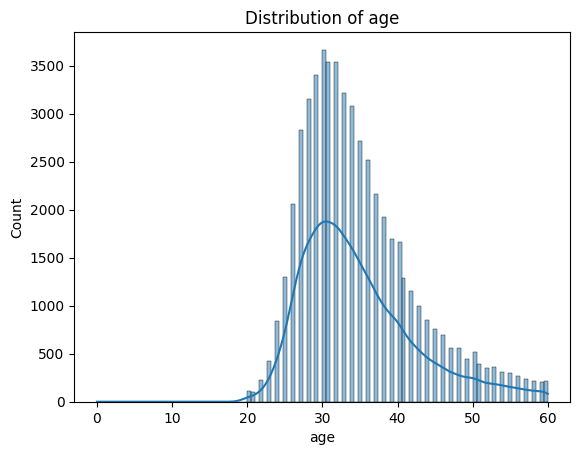

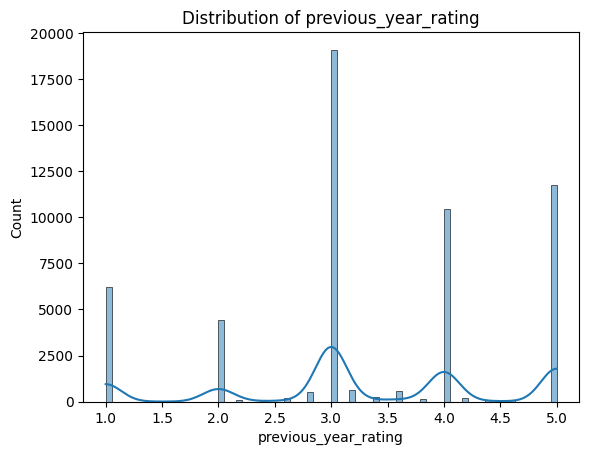

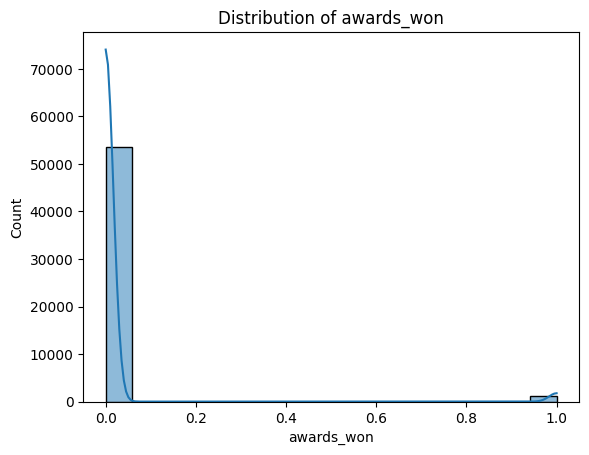

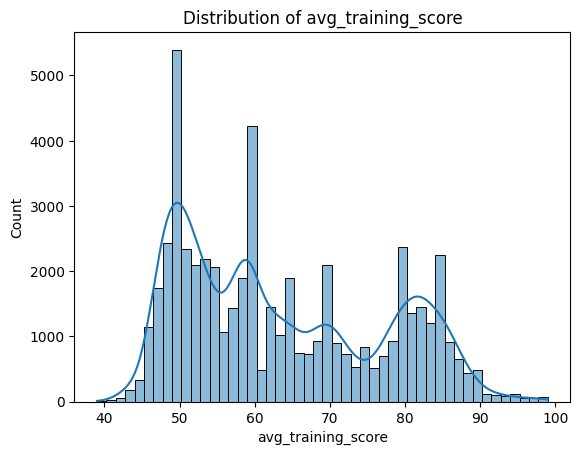

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for all numeric columns
for column in data.select_dtypes(include=['float64']).columns:
    plt.figure()
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

Univariate Analysis - Count Plots for Categorical Data

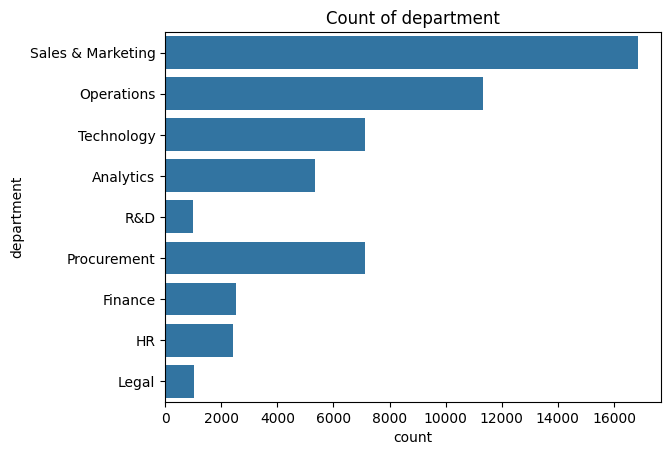

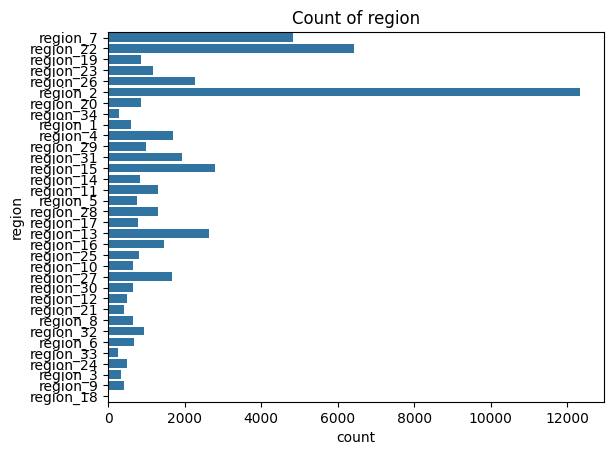

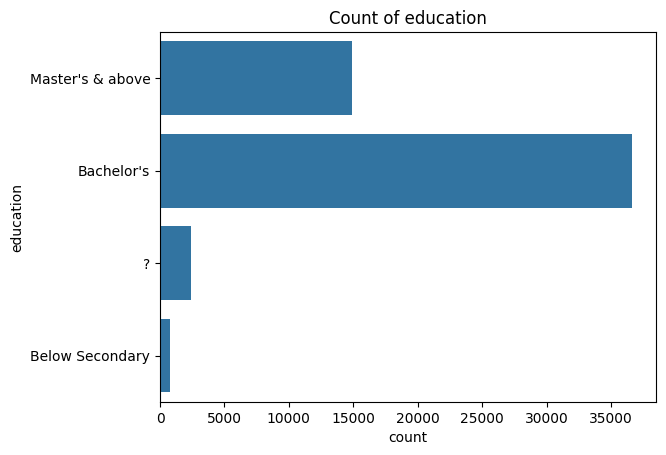

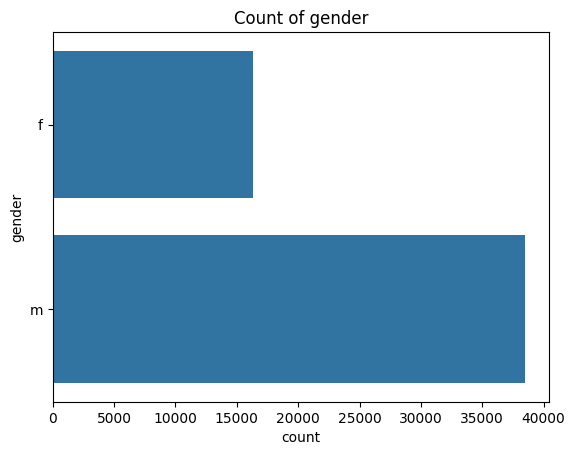

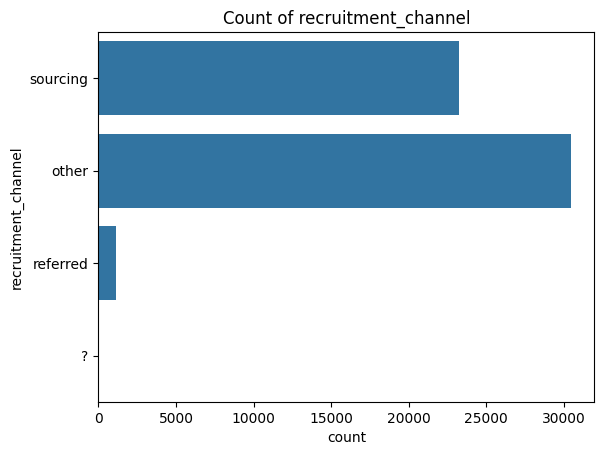

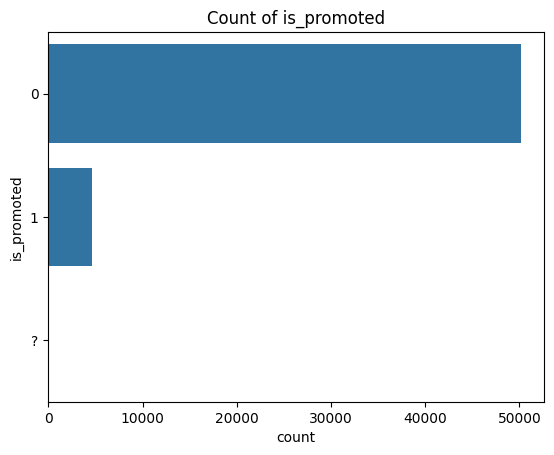

In [32]:
# Count plot for categorical columns
for column in data.select_dtypes(include=['object']).columns:
    plt.figure()
    sns.countplot(y=data[column])
    plt.title(f'Count of {column}')
    plt.show()

Bivariate Analysis - Boxplot for Categorical vs. Numeric Data

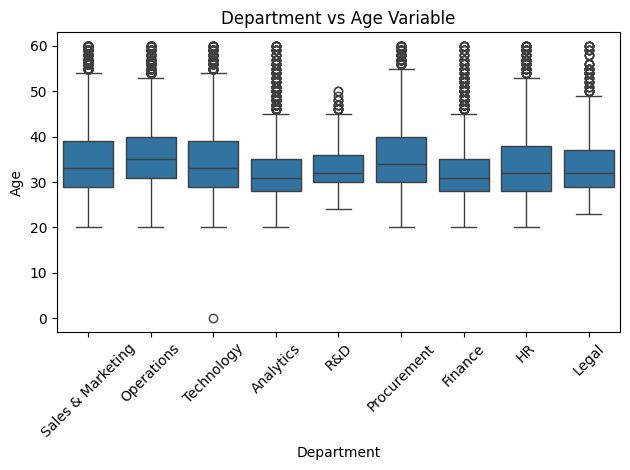

In [33]:
sns.boxplot(x='department', y='age', data=data)
plt.title('Department vs Age Variable')
plt.xlabel('Department')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bivariate Analysis - Boxplot for Categorical vs. Categorical Data

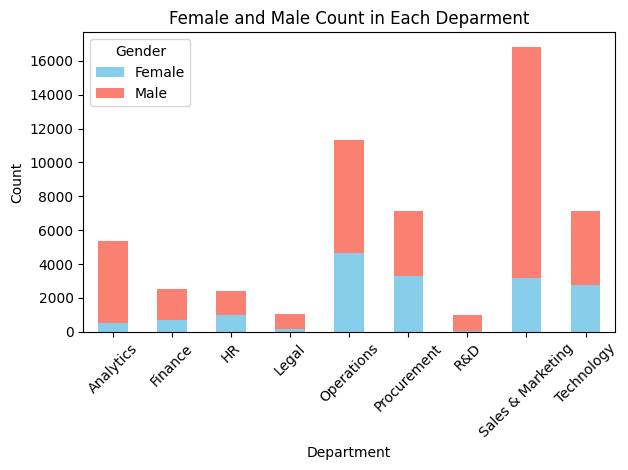

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# First, create a grouped dataframe with counts of each gender per department
gender_counts = data.groupby(['department', 'gender']).size().unstack()

# Plot a stacked bar chart
gender_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Female and Male Count in Each Deparment')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bivariate Analysis - Correlation Matrix Heatmap

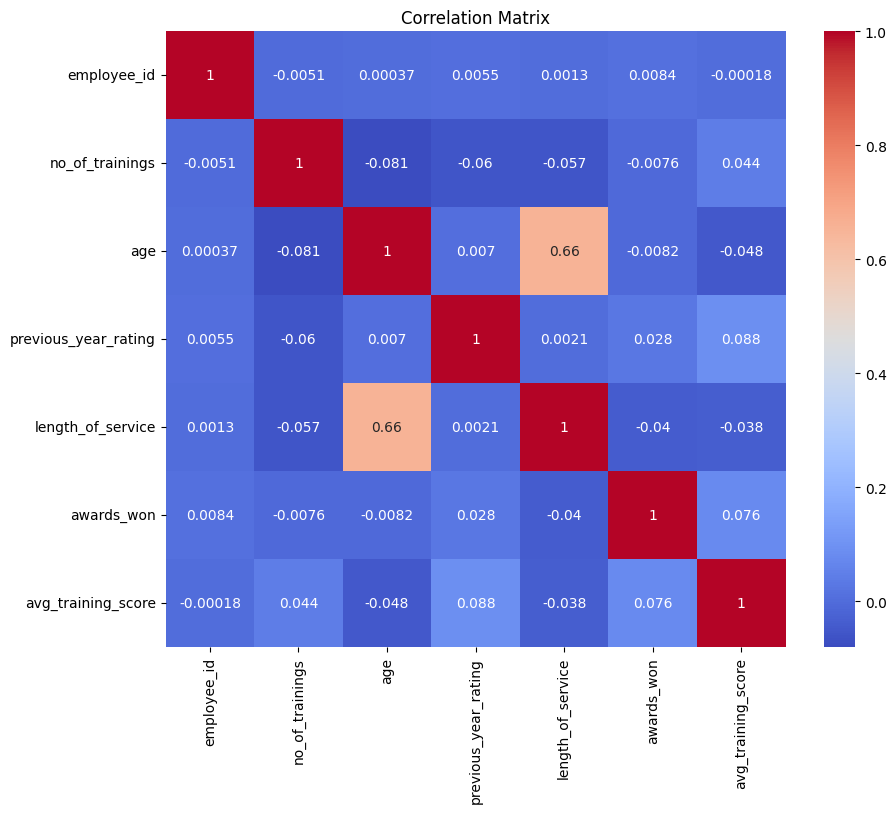

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix on numeric columns
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Bivariate Analysis - Scatter Plot for Two Numeric Variables

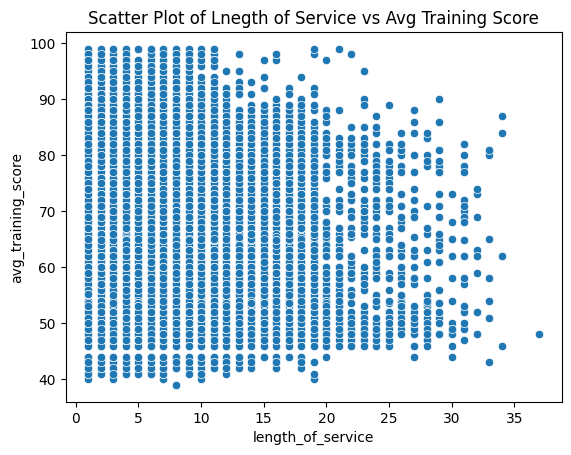

In [36]:
sns.scatterplot(x='length_of_service', y='avg_training_score', data=data)
plt.title('Scatter Plot of Lnegth of Service vs Avg Training Score')
plt.show()

Pairplot for Multivariate Relationship

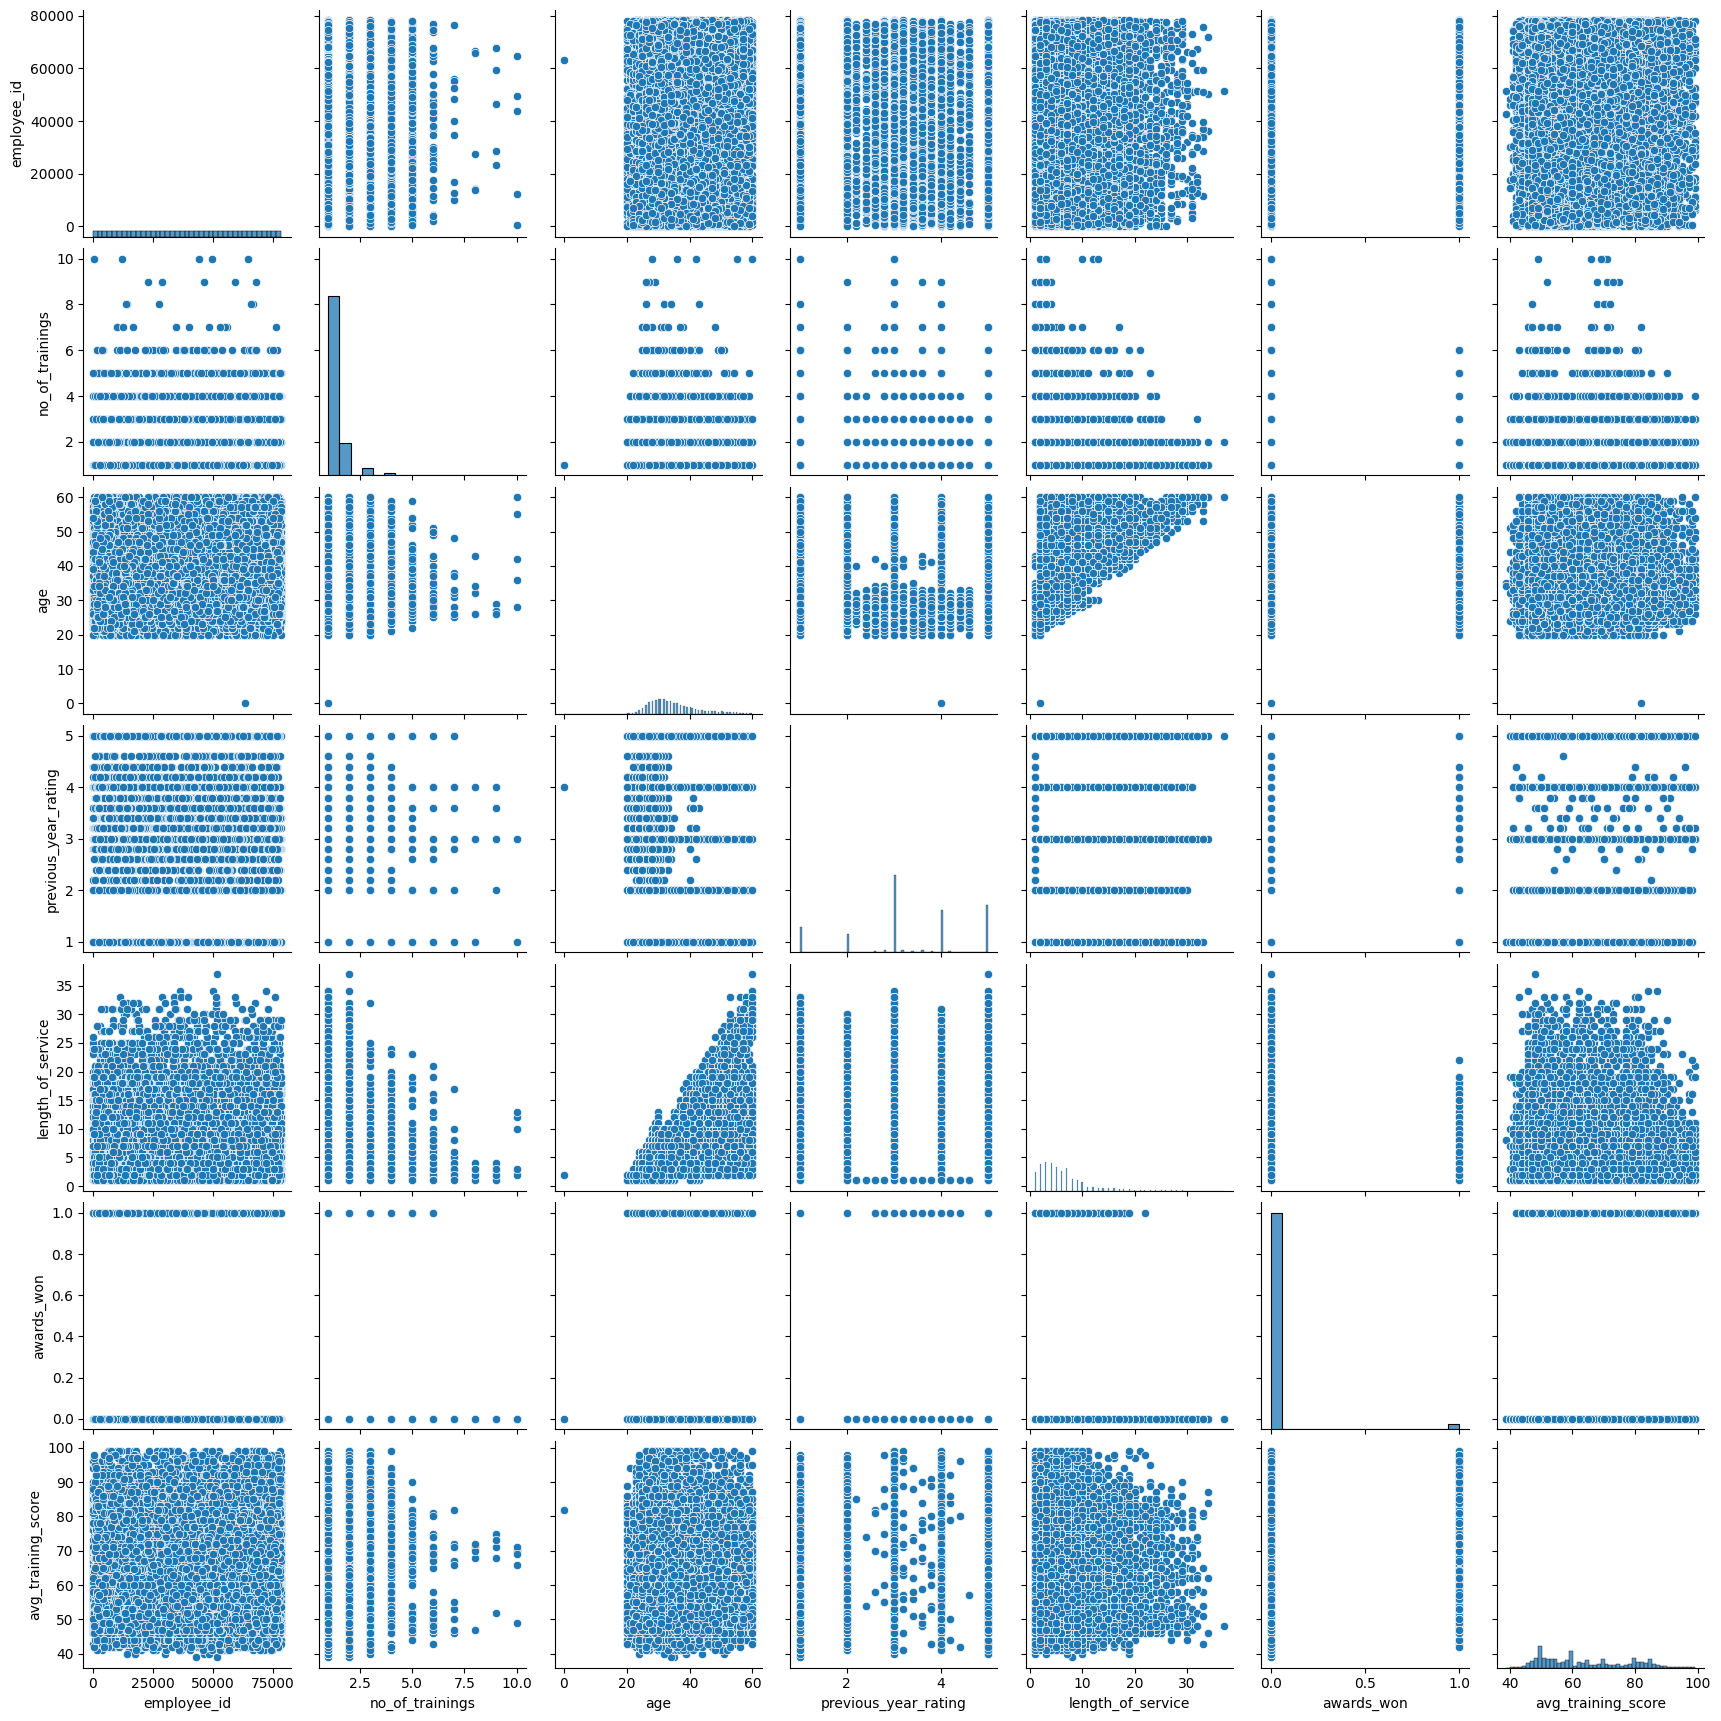

In [37]:
sns.pairplot(data.select_dtypes(include=['float64', 'int64']))
plt.show()

## Module 4: Data Summarization and Visualization

Boxplot for Outlier Detection in Numeric Data

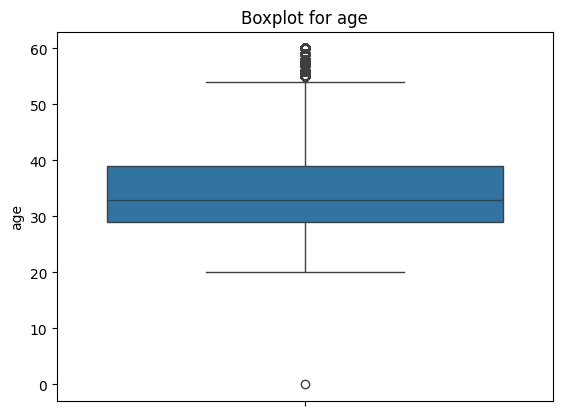

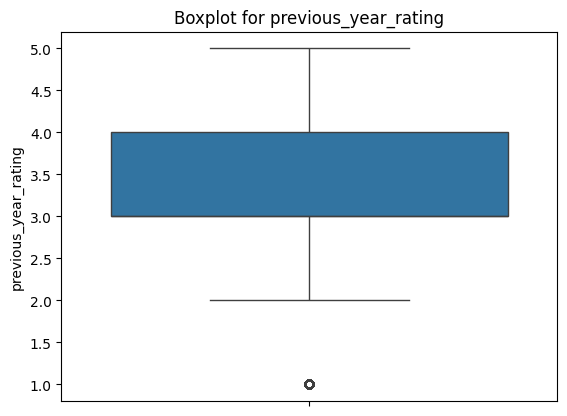

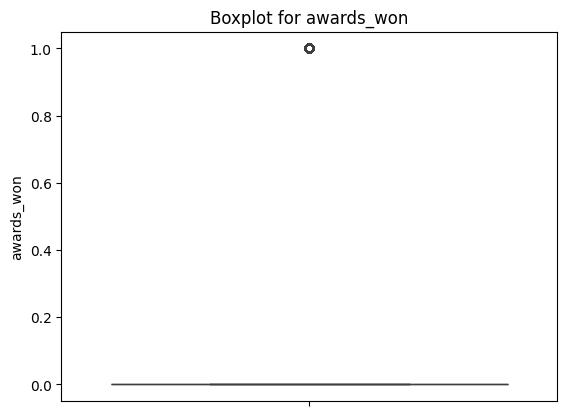

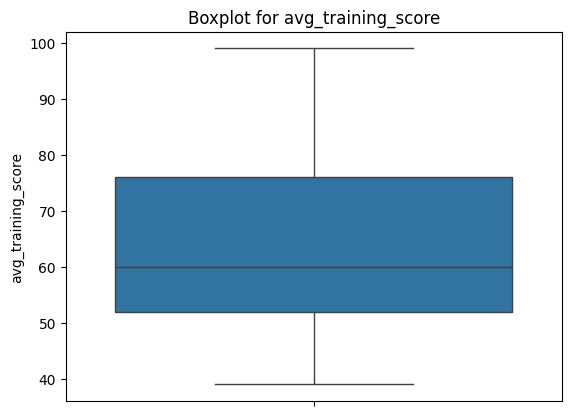

In [38]:
for column in data.select_dtypes(include=['float64']).columns:
    plt.figure()
    sns.boxplot(data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

Summary Statistics by Category

In [39]:
# Summary of numeric data grouped by a department variable
print(data.groupby('region').describe())

          employee_id                                                         \
                count          mean           std     min       25%      50%   
region                                                                         
region_1        610.0  38180.622951  22058.499137    47.0  19664.75  36310.0   
region_10       648.0  38045.382716  21929.859705   248.0  19832.50  36921.5   
region_11      1315.0  38683.384030  22591.070302    48.0  19875.50  38742.0   
region_12       500.0  38180.718000  21660.729746    80.0  19933.50  37266.5   
region_13      2648.0  39635.132175  22710.856549   142.0  20669.25  39822.5   
region_14       827.0  38036.943168  22294.198936    34.0  18422.00  37324.0   
region_15      2808.0  39754.835470  22531.613390    39.0  20120.00  39688.5   
region_16      1465.0  39266.752901  22723.472682    72.0  19427.00  39845.0   
region_17       796.0  40079.967337  22596.887917    94.0  20465.50  41618.0   
region_18        31.0  43841.387097  228

Cross Tabulation and Contingency Table for Categorical Data

In [40]:
# Cross tabulation of gender and education columns
crosstab = pd.crosstab(data['gender'], data['education'])
print(crosstab)

education     ?  Bachelor's  Below Secondary  Master's & above
gender                                                        
f           391       10854              289              4778
m          2019       25814              516             10147


Bar Plot for Categorical Column Distributions

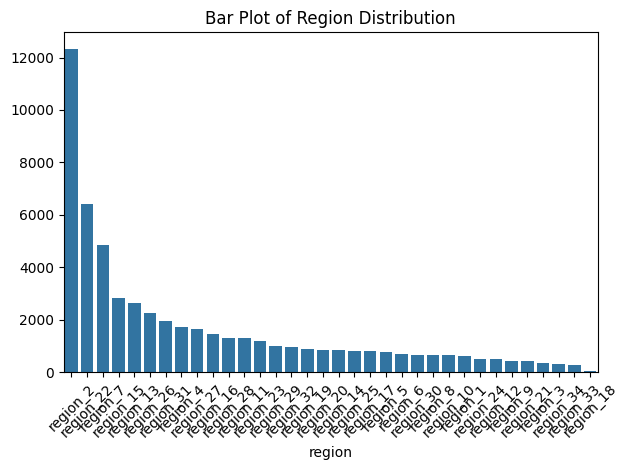

In [43]:
sns.barplot(x=data['region'].value_counts().index,
            y=data['region'].value_counts().values)
plt.title('Bar Plot of Region Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Module 5: Clustering Algorithms

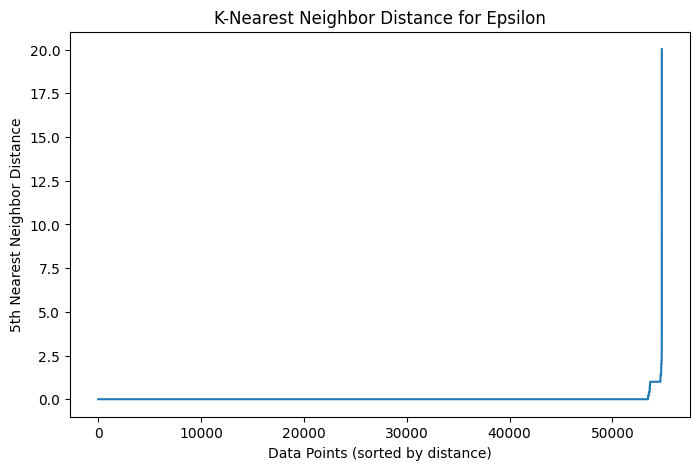

In [62]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Select features for clustering
X = data[['age', 'avg_training_score']]

# Compute the nearest neighbors
neighbors = NearestNeighbors(n_neighbors=5)  # Using 5 as a common choice for min_samples
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort distances to find the "elbow"
distances = np.sort(distances[:, 4])  # Take the distance to the 5th neighbor for each point
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('K-Nearest Neighbor Distance for Epsilon')
plt.xlabel('Data Points (sorted by distance)')
plt.ylabel('5th Nearest Neighbor Distance')
plt.show()

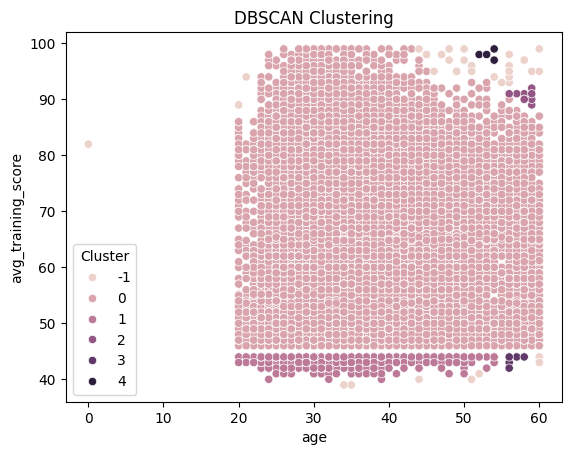

In [63]:
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for clustering
X = data[['age', 'avg_training_score']]

# Applying DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # eps selected from elbow
data['Cluster'] = dbscan.fit_predict(X)

# Visualize clusters (DBSCAN assigns -1 to noise points)
sns.scatterplot(x='age', y='avg_training_score', hue='Cluster', data=data)
plt.title('DBSCAN Clustering')
plt.show()


## Module 6: Dimensionality Reduction

In [64]:
numerical_data = data_scaled.select_dtypes(include=['float64'])

Principal Component Analysis (PCA)

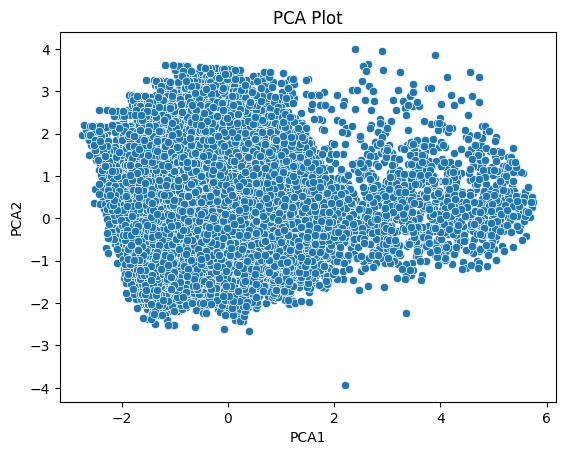

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_data)

numerical_data['PCA1'] = pca_result[:, 0]
numerical_data['PCA2'] = pca_result[:, 1]

# Plot PCA results
sns.scatterplot(x='PCA1', y='PCA2', data=numerical_data)
plt.title('PCA Plot')
plt.show()

t-SNE for Dimensionality Reduction

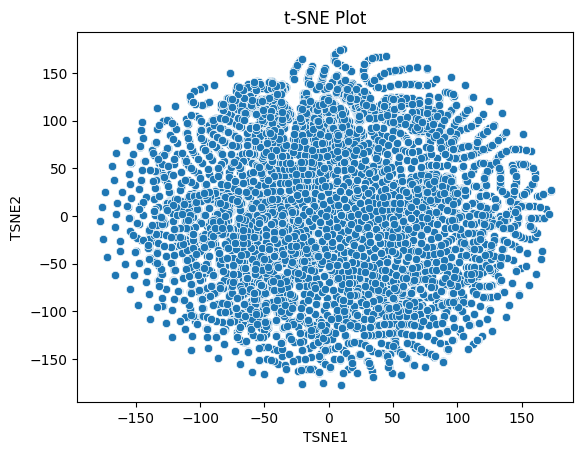

In [67]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(numerical_data)

numerical_data['TSNE1'] = tsne_result[:, 0]
numerical_data['TSNE2'] = tsne_result[:, 1]

sns.scatterplot(x='TSNE1', y='TSNE2', data=numerical_data)
plt.title('t-SNE Plot')
plt.show()
